In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [8]:
#Load dataset
train_df = pd.read_csv("../data/train.csv")
train_df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
#Inspect Missing Values

train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Handle Missing Values 
# Drop 'Cabin' and 'Ticket' — too many missing or not useful
train_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

# Fill missing Age with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill missing Embarked with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


In [11]:
#Encode Categorical Variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)


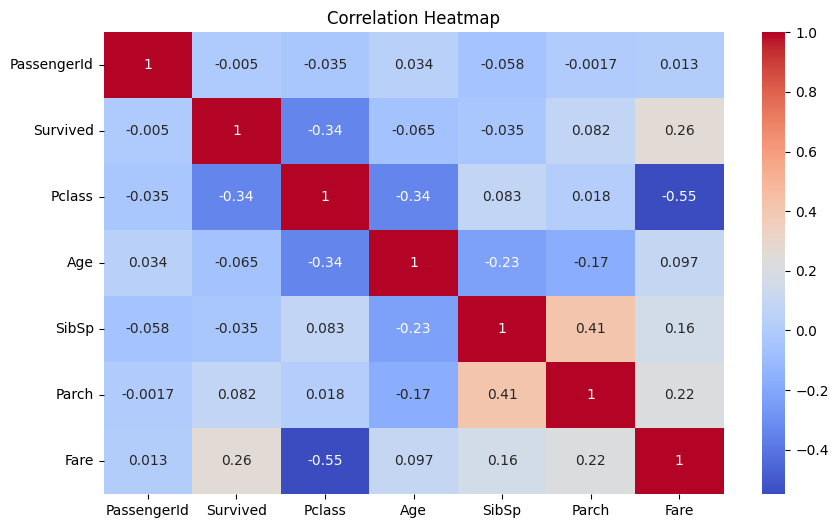

In [12]:
#Visualize Correlations
plt.figure(figsize=(10,6))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


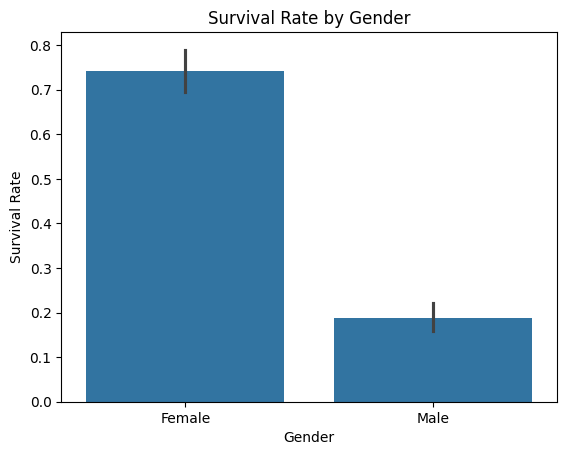

In [14]:
#Survival Rate by Gender
sns.barplot(data=train_df, x='Sex_male', y='Survived')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()


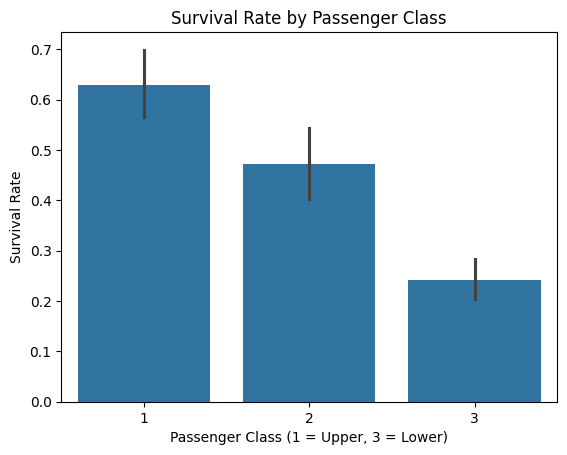

In [15]:
# Survival Rate by Passenger Class
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (1 = Upper, 3 = Lower)')
plt.show()


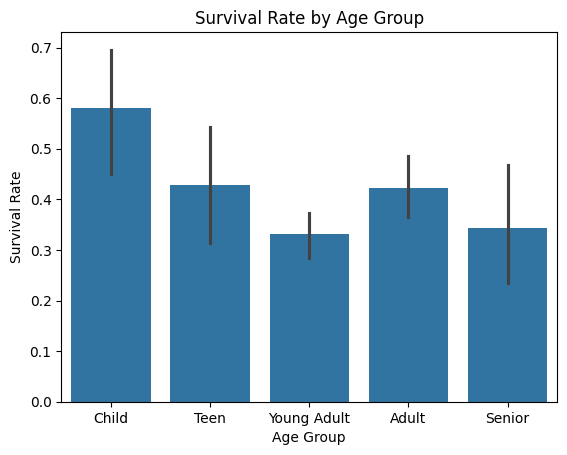

In [16]:
#Survival Count by Age Group (Binned)
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 30, 50, 80], 
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

sns.barplot(data=train_df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()


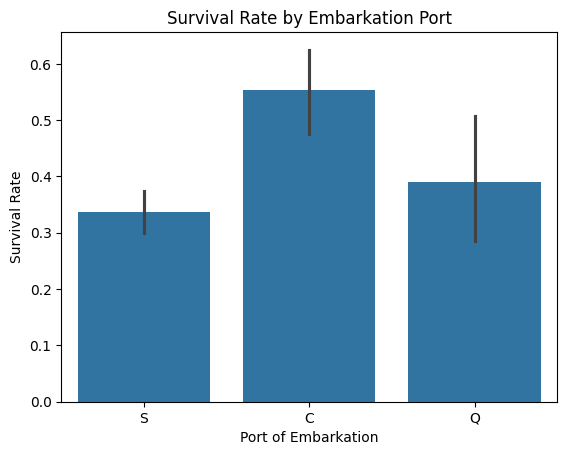

In [17]:
#Survival Rate by Embarkation Port
# Load again if needed
temp_df = pd.read_csv("../data/train.csv")
temp_df['Survived'] = train_df['Survived']  # carry over actual results

sns.barplot(data=temp_df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.show()


In [19]:
# | Plot                    | What It Reveals                               |
# | ----------------------- | --------------------------------------------- |
# | Survival by Gender      | Women had much higher survival rates          |
# | Survival by Class       | 1st class passengers survived more            |
# | Survival by Age Group   | Children and young adults had better survival |
# | Survival by Embarkation | Port C had higher survival rates than S       |


In [22]:
#Prepare Features & Target
# Drop target, ID, name, and any non-numeric helper columns
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'AgeGroup'], axis=1)  # AgeGroup dropped here
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
#Evaluate the Model
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [26]:
#Save the Trained Model
joblib.dump(model, "../outputs/titanic_model.pkl")


['../outputs/titanic_model.pkl']

In [27]:
#Load and Clean Test Data
test_df = pd.read_csv("../data/test.csv")
passenger_ids = test_df['PassengerId']

# Drop same columns as training set
test_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

# Fill missing Age and Fare
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())

# One-hot encode
test_df = pd.get_dummies(test_df, columns=[col for col in ['Sex', 'Embarked'] if col in test_df.columns], drop_first=True)

# Align with training set columns
X_test_final = test_df.reindex(columns=X.columns, fill_value=0)


In [28]:
#Predict and Save Submission
test_preds = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": test_preds
})

submission.to_csv("../outputs/submission.csv", index=False)
